In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
maternal = pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\maternalMortalityRatio.csv")

In [4]:
maternal.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Maternal mortality ratio (per 100 000 live bir...,638 [427-1010]
1,Afghanistan,2016,Maternal mortality ratio (per 100 000 live bir...,673 [457-1040]
2,Afghanistan,2015,Maternal mortality ratio (per 100 000 live bir...,701 [501-1020]
3,Afghanistan,2014,Maternal mortality ratio (per 100 000 live bir...,786 [592-1080]
4,Afghanistan,2013,Maternal mortality ratio (per 100 000 live bir...,810 [617-1080]


In [6]:
allCountries = maternal['Location'].unique().tolist()
print(len(allCountries))

184


In [7]:
maternal['Lower'] = maternal['First Tooltip'].apply(lambda s:float(s.split(" ")[1][1:-1].split("-")[0]))
maternal['Upper'] = maternal['First Tooltip'].apply(lambda s:float(s.split(" ")[1][1:-1].split("-")[1]))
maternal['First Tooltip'] = maternal['First Tooltip'].apply(lambda s:float(s.split(" ")[0]))

In [8]:
maternal.head()

,Location,Period,Indicator,First Tooltip,Lower,Upper
0,Afghanistan,2017,Maternal mortality ratio (per 100 000 live bir...,638.0,427.0,1010.0
1,Afghanistan,2016,Maternal mortality ratio (per 100 000 live bir...,673.0,457.0,1040.0
2,Afghanistan,2015,Maternal mortality ratio (per 100 000 live bir...,701.0,501.0,1020.0
3,Afghanistan,2014,Maternal mortality ratio (per 100 000 live bir...,786.0,592.0,1080.0
4,Afghanistan,2013,Maternal mortality ratio (per 100 000 live bir...,810.0,617.0,1080.0


In [10]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = maternal[maternal['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Maternal Mortality")
    plt.title("Maternal mortality ratio (per 100 000 live births)")
    plt.show()

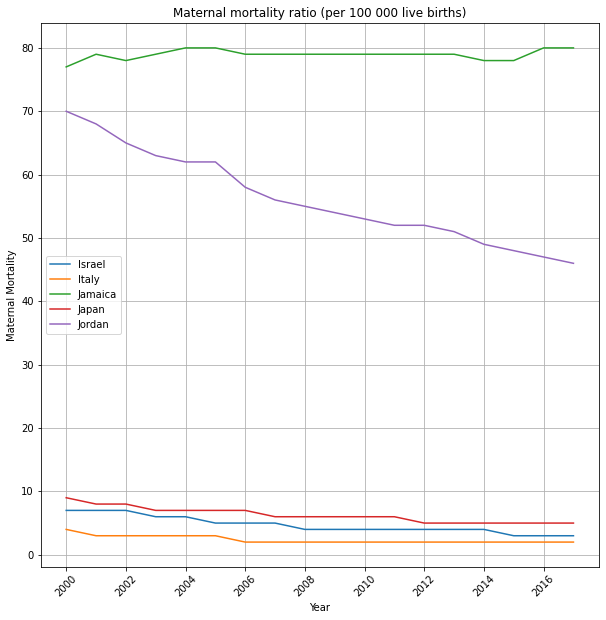

In [11]:
import random
i=random.randint(0,len(allCountries)-5)
countries=allCountries[i:i+5]
compareCountries(countries)
    

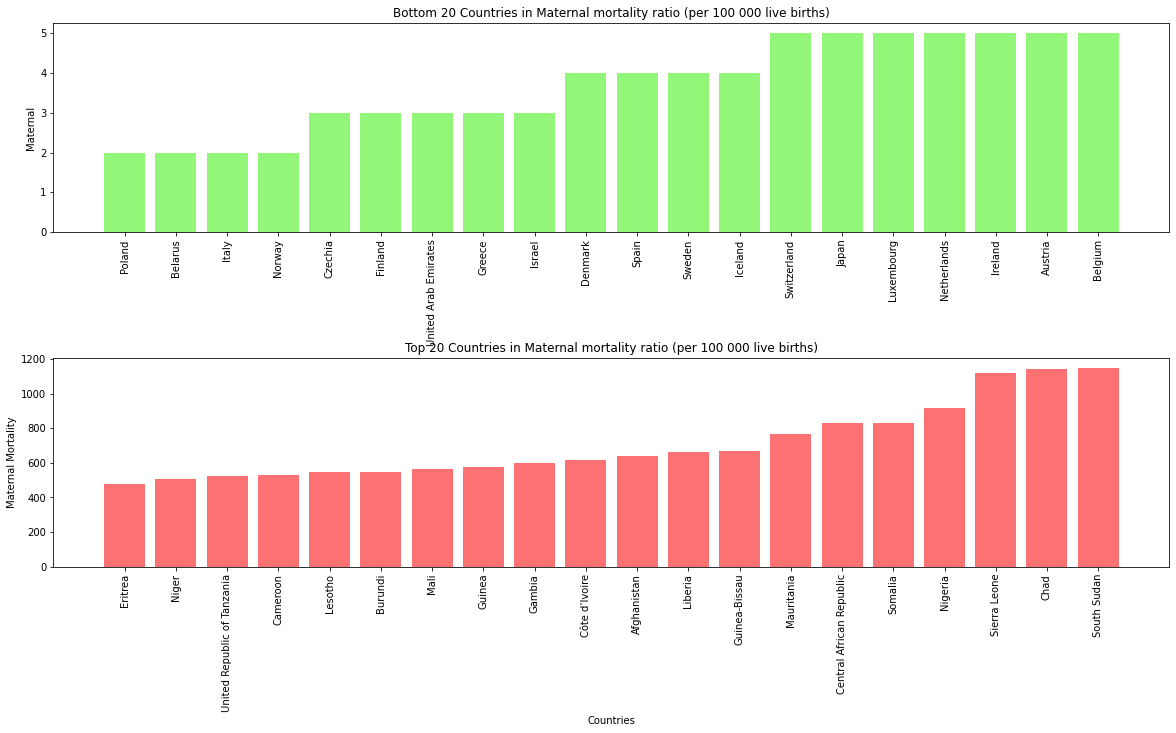

In [16]:
tempData = maternal[maternal['Period'] == 2017]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
tempDataTop = tempData[:20]
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((2,1),(0,0))
rects1 = ax1.bar(tempDataTop['Location'], tempDataTop['First Tooltip'], color = "#92f779")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Maternal")
ax1.set_title("Bottom 20 Countries in Maternal mortality ratio (per 100 000 live births)")
    
ax2 = plt.subplot2grid((2,1),(1,0))
rects2 = ax2.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

ax2.set_xlabel("Countries")
ax2.set_ylabel("Maternal Mortality")
ax2.set_title("Top 20 Countries in Maternal mortality ratio (per 100 000 live births)")
plt.subplots_adjust(hspace = 0.6)
plt.show()

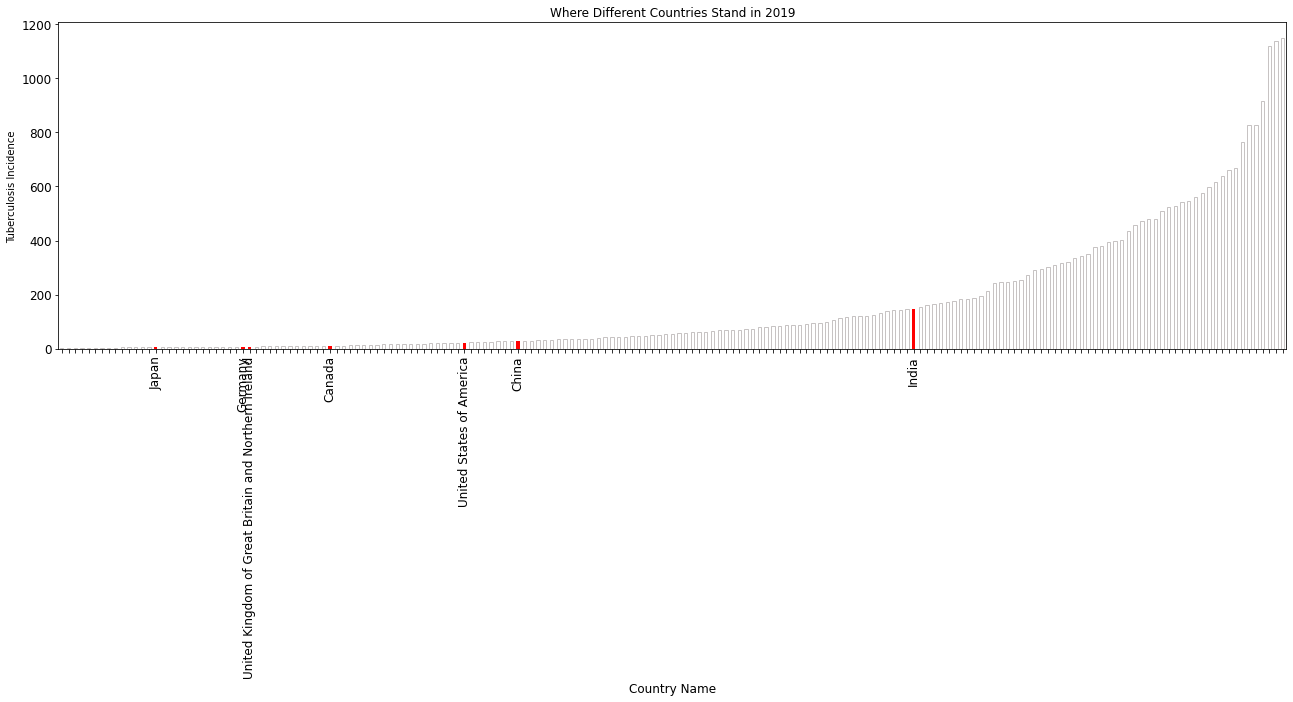

In [17]:
tempData = maternal[maternal['Period'] == 2017]
tempData.sort_values('First Tooltip', inplace=True)
tempData.reset_index(inplace=True)
tempData.set_index('Location',drop=True,inplace=True)
countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']


ax_1 = tempData['First Tooltip'].plot(kind='bar', title ="graph", figsize=(22, 6), fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=12)
ax_1.set_title("Where Different Countries Stand in 2019")
ax_1.set_ylabel("Tuberculosis Incidence")
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        

Plot For TOP 5 Countries


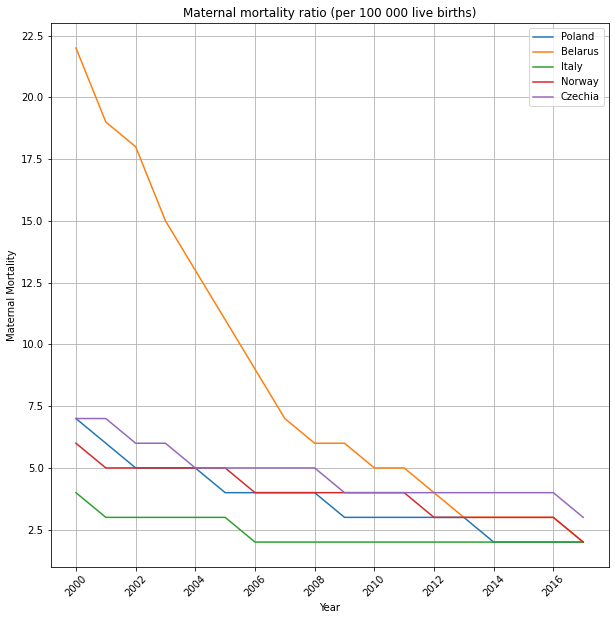

Plot For BOTTOM 5 Countries


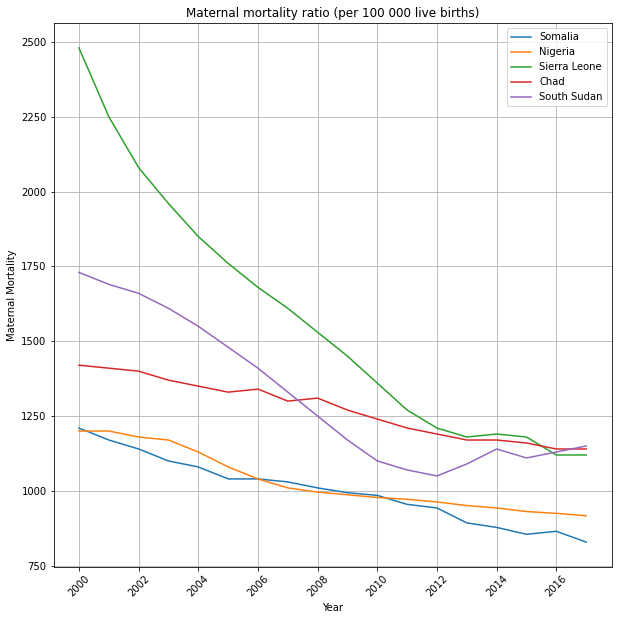

In [18]:
tempData = maternal[maternal['Period'] == 2017]
tempData.sort_values('First Tooltip', inplace=True)
top5countries = tempData[:5].Location.values.tolist()
bot5countries = tempData[-5:].Location.values.tolist()
print("Plot For TOP 5 Countries")
compareCountries(top5countries)
print("Plot For BOTTOM 5 Countries")
compareCountries(bot5countries)


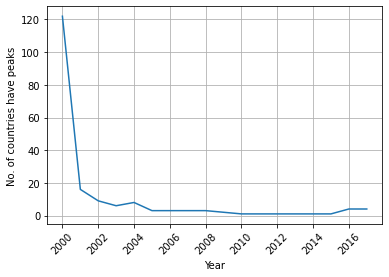

In [19]:
tempData = maternal.sort_values('First Tooltip', ascending=False).groupby("Location").first()
tempData = tempData.groupby("Period")['First Tooltip'].count()
tempData = tempData.reset_index()
tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
fig = plt.figure()
ax = plt.subplot2grid((1,1),(0,0))
ax.plot(tempData['Period'], tempData['First Tooltip'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.xlabel("Year")
plt.ylabel("No. of countries have peaks")
plt.title("")
plt.grid()

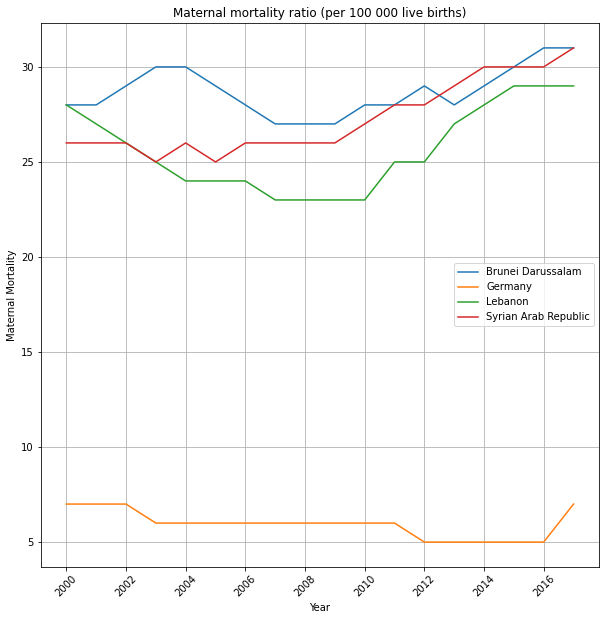

In [21]:
tempData = maternal.sort_values('First Tooltip', ascending=False).groupby("Location").first().reset_index()
countriesPeak2019 = tempData[tempData['Period'] == 2017].Location.values.tolist()
compareCountries(countriesPeak2019)

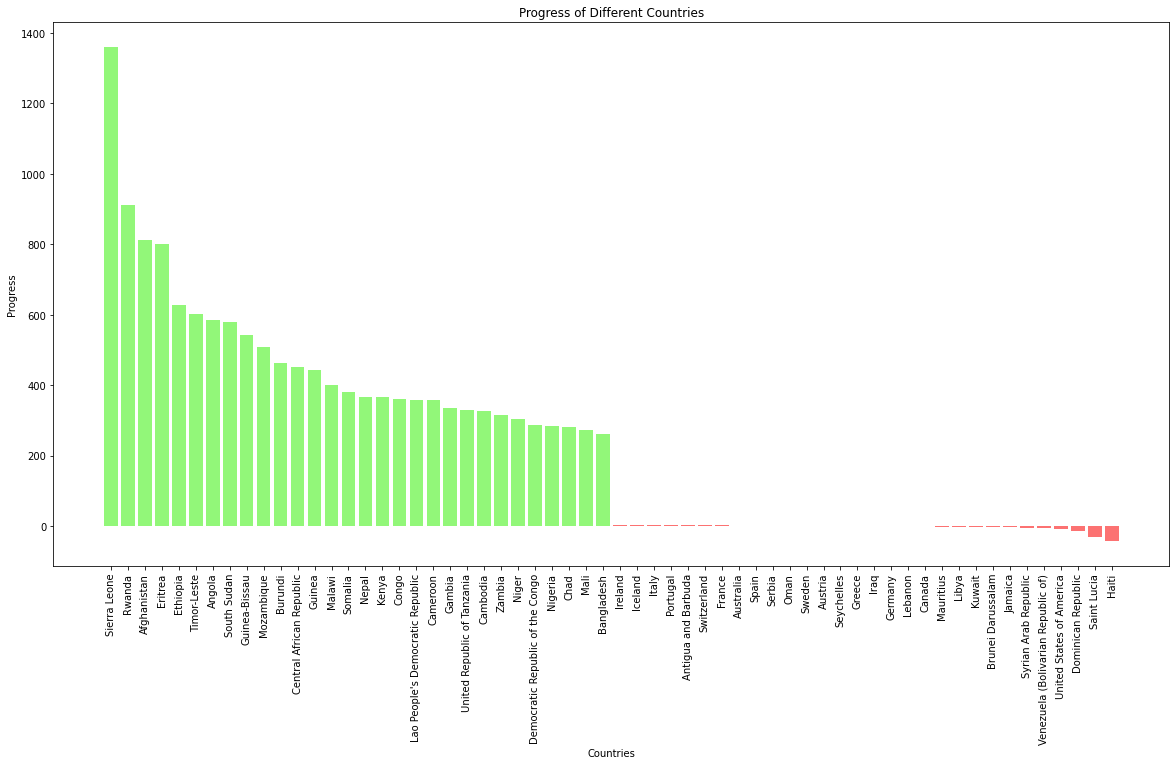

In [22]:
tempData2019 = maternal[maternal['Period'] == 2017]
tempData2000 = maternal[maternal['Period'] == 2000]

tempData2019.set_index("Location", inplace=True)
tempData2000.set_index("Location", inplace=True)

tempData = tempData2019.join(tempData2000, lsuffix='_19', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_19']
tempData.dropna(inplace=True)
tempData.reset_index(inplace=True)
tempData = tempData[['Location', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[:30]
tempDataBot = tempData[-30:]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location'], tempDataTop['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location'], tempDataBot['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Progress of Different Countries")
plt.show()

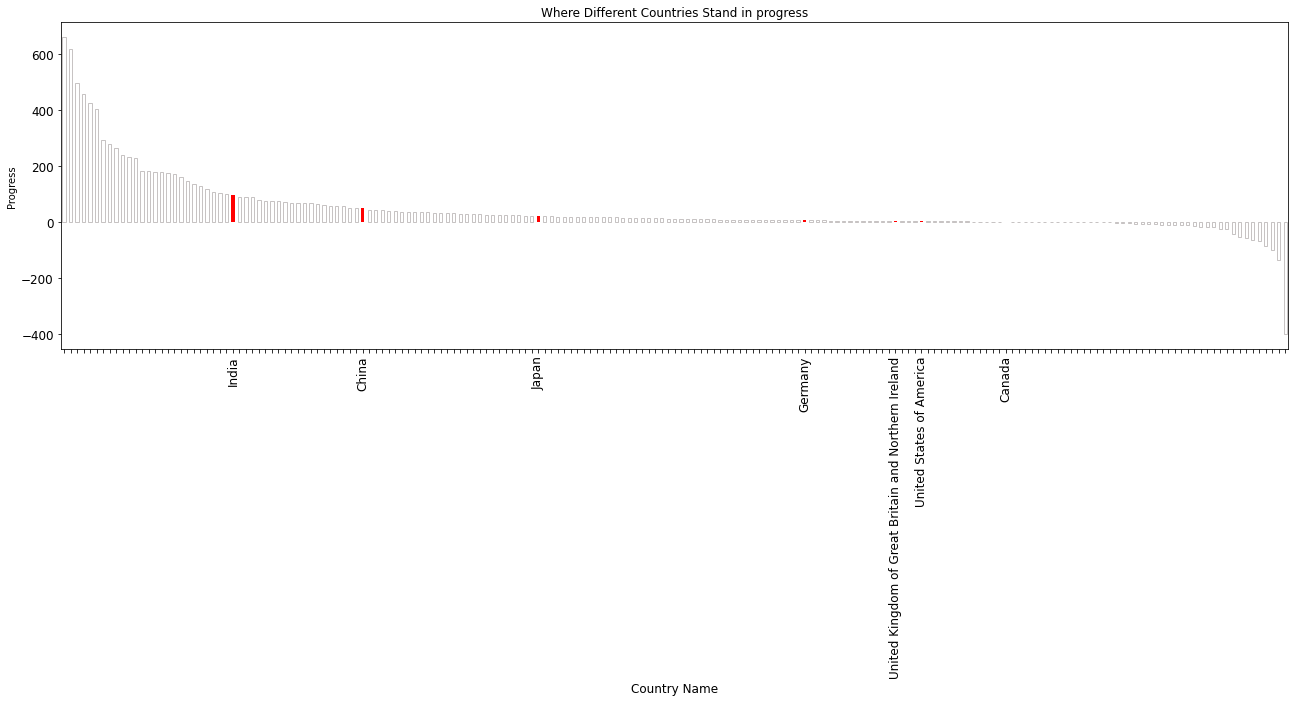

In [17]:
tempData2019 = tuberculosis[tuberculosis['Period'] == 2019]
tempData2000 = tuberculosis[tuberculosis['Period'] == 2000]

tempData2019.set_index("Location", inplace=True)
tempData2000.set_index("Location", inplace=True)

tempData = tempData2019.join(tempData2000, lsuffix='_19', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_19']
tempData.dropna(inplace=True)
tempData.reset_index(inplace=True)
tempData = tempData[['Location', 'progress']].sort_values('progress', ascending=False)
tempData.set_index("Location", inplace=True)

countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']


ax_1 = tempData['progress'].plot(kind='bar', title ="graph", figsize=(22, 6), fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=12)
ax_1.set_title("Where Different Countries Stand in progress")
ax_1.set_ylabel("Progress")
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        

Top 2 countries with highest positive growth


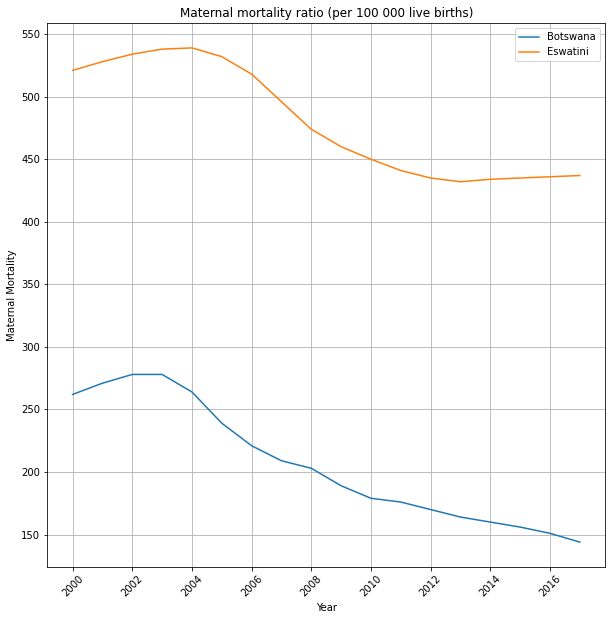

In [26]:
print('Top 2 countries with highest positive growth')
countries = ['Botswana', 'Eswatini']
compareCountries(countries)